MSSV 22637851
Tên Nguyễn Thị Ngọc Bích
STT 05
Điểm tự chấm: 6 điểm

In [72]:
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [85]:
df = pd.read_csv('./brfss_2000.csv')

Câu 2.1

In [74]:
df.head(5)

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
0,0,1,0,70,175,175,77,m,good
1,0,1,1,64,125,115,33,f,good
2,1,1,1,60,105,105,49,f,good
3,1,1,0,66,132,124,42,f,good
4,0,1,0,61,150,130,55,f,very good


In [75]:
df.shape

(20000, 9)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   exerany   20000 non-null  int64 
 1   hlthplan  20000 non-null  int64 
 2   smoke100  20000 non-null  int64 
 3   height    20000 non-null  int64 
 4   weight    20000 non-null  int64 
 5   wtdesire  20000 non-null  int64 
 6   age       20000 non-null  int64 
 7   gender    20000 non-null  object
 8   genhlth   20000 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


- Thuộc tinh exerany, hlthplan, smoke100, height, weight, wtdesire, age: là thuộc tính định lượng
- Thuộc tính gender và genhlth là thuộc tính phân loại

Câu 2.2


In [77]:
mean = df['weight'].mean().round(2)
median = df['weight'].median()
max = df['weight'].max()
min = df['weight'].min()
range = max - min

q75, q25 = np.percentile(df['weight'], [75 ,25])
iqr = q75-q25

print("Khảo sát thuộc tính cân nặng(weight): ")
print("Trung bình: ", mean)
print("Trung vị: ", median)
print("Miền giá trị: ", range)
print("Miền phân vị: ", iqr)

Khảo sát thuộc tính cân nặng(weight): 
Trung bình:  169.68
Trung vị:  165.0
Miền giá trị:  432
Miền phân vị:  50.0


Câu 2.3

Tỉ lệ người hút thuốc

In [78]:
sample = df['smoke100'].value_counts().sum()
smoke = df[df['smoke100'] == 1].value_counts().sum()
ti_le = smoke/sample
print(ti_le)

0.47205


Tỉ lệ nam hút thuốc, tỉ lệ nữ hút thuốc

In [79]:
m_smoke = df[df['gender'] == 'm']['smoke100'].value_counts().sum() / sample
print("Tỉ lệ nam hút thuốc: ", m_smoke)
f_smoke = df[df['gender'] == 'f']['smoke100'].value_counts().sum() / sample
print("Tỉ lệ nữ hút thuốc: ", f_smoke)

Tỉ lệ nam hút thuốc:  0.47845
Tỉ lệ nữ hút thuốc:  0.52155


Câu 2.4

In [80]:
df['BMI'] =  (df['weight']/ df['height']*df['height'])*703

In [81]:
df.head()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth,BMI
0,0,1,0,70,175,175,77,m,good,123025.0
1,0,1,1,64,125,115,33,f,good,87875.0
2,1,1,1,60,105,105,49,f,good,73815.0
3,1,1,0,66,132,124,42,f,good,92796.0
4,0,1,0,61,150,130,55,f,very good,105450.0


Text(0, 0.5, 'Frequency')

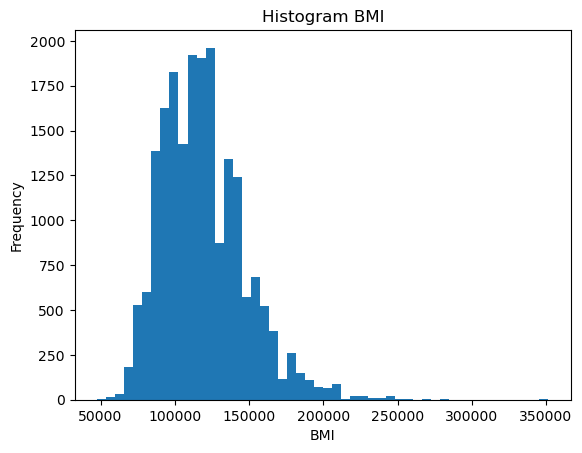

In [82]:
plt.hist(df['BMI'], bins=50)
plt.title('Histogram BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Nhận xét: Chỉ số BMI càng cao cân nặng càng lớn -> thừa cân 
và ngược lại
          Chỉ số BMI càng thấp cân nặng càng nhỏ -> thiếu cân
          
Chỉ số BMI của nam đa số cao hơn của nữ


In [83]:
data = {'BMI': df['BMI'], 'Genhlth': df['genhlth']}
df = pd.DataFrame(data)

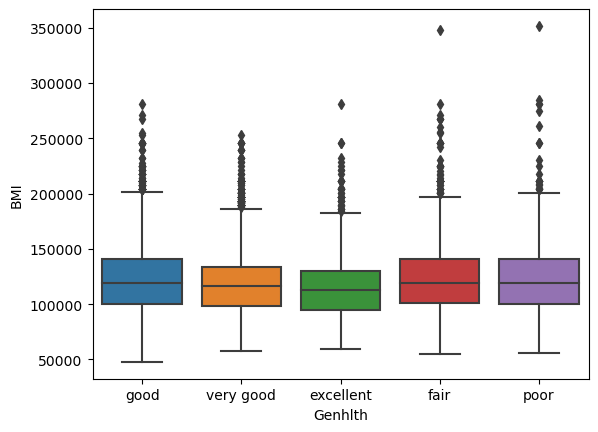

In [84]:
sns.boxplot(x='Genhlth', y='BMI',data=df)
plt.show()